<a href="https://colab.research.google.com/github/LaurenVaught/FinancialTimeSeries/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingest

##Libraries

In [158]:
import numpy as np
from numpy import arange
import pandas as pd
import os
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error

import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
#from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
import xgboost as xg
#from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy
import math
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [159]:
#upload from raw link on github
df = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/FinancialTimeSeries/main/SP500.csv') 

#EDA

In [160]:
df.shape

(1259, 7)

In [161]:
df.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,28-Feb-22,4354.17,4388.84,4315.12,4373.94,4373.94,4.594010e+09
1,25-Feb-22,4298.38,4385.34,4286.83,4384.65,4384.65,3.941780e+09
2,24-Feb-22,4155.77,4294.73,4114.65,4288.70,4288.70,5.070560e+09
3,23-Feb-22,4324.93,4341.51,4221.51,4225.50,4225.50,3.814340e+09
4,22-Feb-22,4332.74,4362.12,4267.11,4304.76,4304.76,4.007780e+09


In [162]:
df.info

<bound method DataFrame.info of            Date     Open     High      Low    Close  AdjClose        Volume
0     28-Feb-22  4354.17  4388.84  4315.12  4373.94   4373.94  4.594010e+09
1     25-Feb-22  4298.38  4385.34  4286.83  4384.65   4384.65  3.941780e+09
2     24-Feb-22  4155.77  4294.73  4114.65  4288.70   4288.70  5.070560e+09
3     23-Feb-22  4324.93  4341.51  4221.51  4225.50   4225.50  3.814340e+09
4     22-Feb-22  4332.74  4362.12  4267.11  4304.76   4304.76  4.007780e+09
...         ...      ...      ...      ...      ...       ...           ...
1254   7-Mar-17  2370.74  2375.12  2365.51  2368.39   2368.39  3.518390e+09
1255   6-Mar-17  2375.23  2378.80  2367.98  2375.31   2375.31  3.232700e+09
1256   3-Mar-17  2380.92  2383.89  2375.39  2383.12   2383.12  3.555260e+09
1257   2-Mar-17  2394.75  2394.75  2380.17  2381.92   2381.92  3.821320e+09
1258   1-Mar-17  2380.13  2400.98  2380.13  2395.96   2395.96  4.345180e+09

[1259 rows x 7 columns]>

In [163]:
#missing values
total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)[(df.isnull().sum() / df.isnull().count()).sort_values(ascending = False) != 0]
missing = pd.concat([total, percent], axis = 1, keys = ['Total Missing', 'Percent Missing'])
print(missing)

Empty DataFrame
Columns: [Total Missing, Percent Missing]
Index: []


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1259 non-null   object 
 1   Open      1259 non-null   float64
 2   High      1259 non-null   float64
 3   Low       1259 non-null   float64
 4   Close     1259 non-null   float64
 5   AdjClose  1259 non-null   float64
 6   Volume    1259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.0+ KB


In [165]:
#missing values
df.isnull().any()

Date        False
Open        False
High        False
Low         False
Close       False
AdjClose    False
Volume      False
dtype: bool

In [166]:
#check for duplicates
df.duplicated().sum()

0

There are no duplicates.

In [167]:
df['AdjClose'].value_counts()

2926.46    2
2373.47    2
2723.06    2
2783.02    2
2439.07    2
          ..
3130.01    1
3179.72    1
3145.32    1
3169.94    1
2395.96    1
Name: AdjClose, Length: 1254, dtype: int64

There are no missing values.

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1259.0,3.188839e+03,6.889611e+02,2.290710e+03,2.691105e+03,2.918460e+03,3.634840e+03,4.804510e+03
High,1259.0,3.205340e+03,6.925491e+02,2.300730e+03,2.708745e+03,2.931150e+03,3.643310e+03,4.818620e+03
Low,1259.0,3.170685e+03,6.854006e+02,2.191860e+03,2.677385e+03,2.903820e+03,3.608960e+03,4.780040e+03
Close,1259.0,3.189185e+03,6.893080e+02,2.237400e+03,2.692190e+03,2.919370e+03,3.632530e+03,4.796560e+03
AdjClose,1259.0,3.189185e+03,6.893080e+02,2.237400e+03,2.692190e+03,2.919370e+03,3.632530e+03,4.796560e+03
Volume,1259.0,3.867971e+09,1.067455e+09,1.296540e+09,3.233955e+09,3.589930e+09,4.155015e+09,9.878040e+09


##Daily Adjusted Close


In [169]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

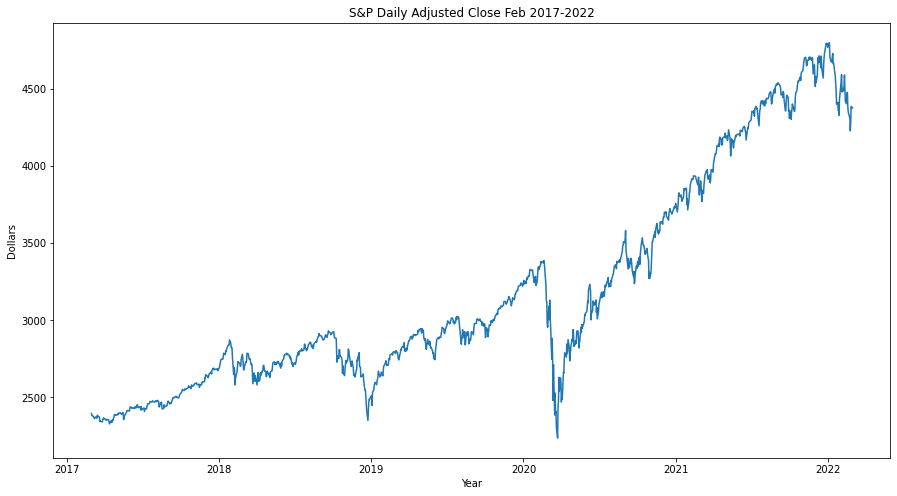

In [170]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
plt.figure(figsize = (15,8))

#https://www.statology.org/matplotlib-time-series/

x = df['Date']
y= df['AdjClose']
plt.title('S&P Daily Adjusted Close Feb 2017-2022')
plt.xlabel('Year')
plt.ylabel('Dollars');

plt.plot(x,y)
plt.show()

#RNN Models


##Simple LSTM

In [171]:
#RNN models adapted from https://www.kaggle.com/abdulmeral/rnn-4-models-for-lstm-plotly
#upload from raw link on github
data = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/FinancialTimeSeries/main/SP500.csv') 

In [172]:
# reshape
# Choice "open" feature:
dataset = data.iloc[:,1].values
dataset = dataset.reshape(-1,1) 
dataset = dataset.astype("float32")
dataset.shape

(1259, 1)

In [173]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [174]:
# train test split
train_size = int(len(dataset) * 0.80) # Split dataset 80% for train set, 20% for test set
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 1007, test size: 252 


In [175]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [176]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [177]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [178]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
996/996 [==============================] - 4s 2ms/step - loss: 0.0161
Epoch 2/50
996/996 [==============================] - 2s 2ms/step - loss: 7.4989e-04
Epoch 3/50
996/996 [==============================] - 2s 2ms/step - loss: 6.6582e-04
Epoch 4/50
996/996 [==============================] - 2s 2ms/step - loss: 6.1133e-04
Epoch 5/50
996/996 [==============================] - 2s 2ms/step - loss: 5.0084e-04
Epoch 6/50
996/996 [==============================] - 2s 2ms/step - loss: 4.5439e-04
Epoch 7/50
996/996 [==============================] - 2s 2ms/step - loss: 4.2007e-04
Epoch 8/50
996/996 [==============================] - 2s 2ms/step - loss: 3.7597e-04
Epoch 9/50
996/996 [==============================] - 2s 2ms/step - loss: 3.4402e-04
Epoch 10/50
996/996 [==============================] - 2s 2ms/step - loss: 3.2619e-04
Epoch 11/50
996/996 [==============================] - 2s 2ms/step - loss: 3.3015e-04
Epoch 12/50
996/996 [==============================] - 2s 2ms/step 

In [179]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore_vanilla = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore_vanilla))

Train Score: 35.74 RMSE
Test Score: 29.65 RMSE


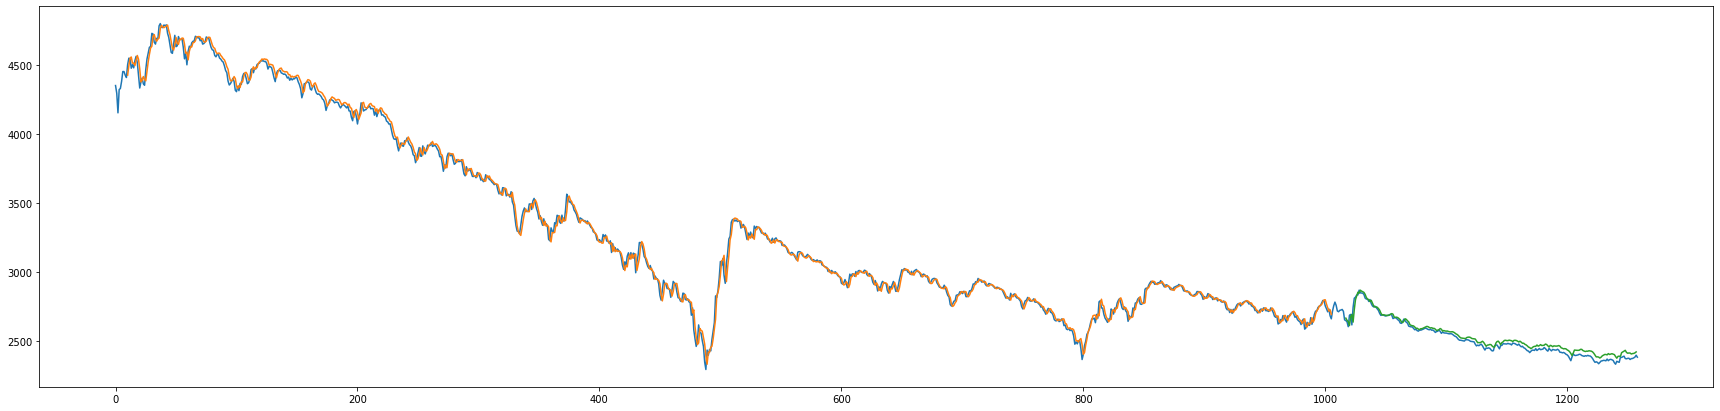

In [180]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
f,ax = plt.subplots(figsize = (30,7))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

##Stacked LSTM

In [181]:
# reshape
# Choice "open" feature:
dataset = data.iloc[:,1].values
dataset = dataset.reshape(-1,1) 
dataset = dataset.astype("float32")
dataset.shape

(1259, 1)

In [182]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [183]:
# train test split
train_size = int(len(dataset) * 0.80) # Split dataset 80% for train set, 20% for test set
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 1007, test size: 252 


In [184]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [185]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [186]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [187]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1,time_stemp)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
996/996 [==============================] - 5s 3ms/step - loss: 0.0123
Epoch 2/50
996/996 [==============================] - 3s 3ms/step - loss: 7.6681e-04
Epoch 3/50
996/996 [==============================] - 3s 3ms/step - loss: 7.0625e-04
Epoch 4/50
996/996 [==============================] - 3s 3ms/step - loss: 5.8213e-04
Epoch 5/50
996/996 [==============================] - 3s 3ms/step - loss: 5.9238e-04
Epoch 6/50
996/996 [==============================] - 3s 3ms/step - loss: 5.9619e-04
Epoch 7/50
996/996 [==============================] - 3s 3ms/step - loss: 5.0116e-04
Epoch 8/50
996/996 [==============================] - 3s 3ms/step - loss: 5.6189e-04
Epoch 9/50
996/996 [==============================] - 3s 3ms/step - loss: 5.6639e-04
Epoch 10/50
996/996 [==============================] - 3s 3ms/step - loss: 5.2672e-04
Epoch 11/50
996/996 [==============================] - 3s 3ms/step - loss: 4.7195e-04
Epoch 12/50
996/996 [==============================] - 3s 3ms/step 

In [188]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore_Stacked = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore_Stacked))

Train Score: 48.81 RMSE
Test Score: 66.44 RMSE


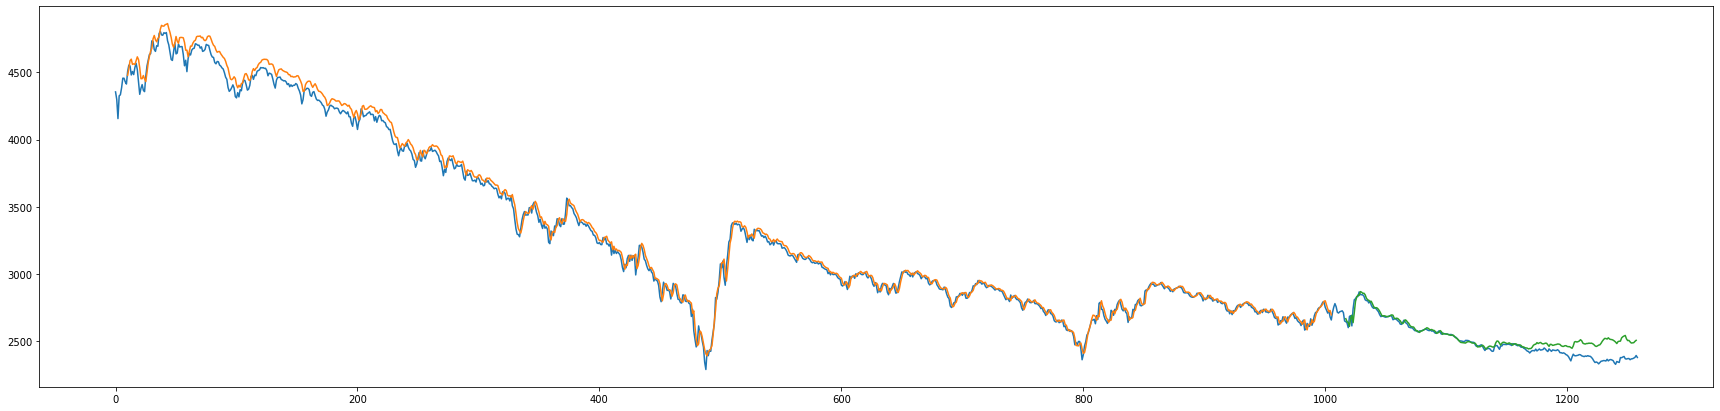

In [189]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
f,ax = plt.subplots(figsize = (30,7))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


##Bidirectional LSTM

In [190]:
# reshape
# Choice "open" feature:
dataset = data.iloc[:,1].values
dataset = dataset.reshape(-1,1) 
dataset = dataset.astype("float32")
dataset.shape

(1259, 1)

In [191]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [192]:
# train test split
train_size = int(len(dataset) * 0.80) # Split dataset 80% for train set, 20% for test set
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 1007, test size: 252 


In [193]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [194]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [195]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [196]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1,time_stemp)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
996/996 [==============================] - 5s 3ms/step - loss: 0.0084
Epoch 2/50
996/996 [==============================] - 3s 3ms/step - loss: 6.6577e-04
Epoch 3/50
996/996 [==============================] - 3s 3ms/step - loss: 5.3320e-04
Epoch 4/50
996/996 [==============================] - 3s 3ms/step - loss: 4.9644e-04
Epoch 5/50
996/996 [==============================] - 3s 3ms/step - loss: 4.9005e-04
Epoch 6/50
996/996 [==============================] - 3s 3ms/step - loss: 4.2755e-04
Epoch 7/50
996/996 [==============================] - 3s 3ms/step - loss: 4.3328e-04
Epoch 8/50
996/996 [==============================] - 3s 3ms/step - loss: 4.0843e-04
Epoch 9/50
996/996 [==============================] - 3s 3ms/step - loss: 3.9218e-04
Epoch 10/50
996/996 [==============================] - 3s 3ms/step - loss: 4.1656e-04
Epoch 11/50
996/996 [==============================] - 3s 3ms/step - loss: 4.0794e-04
Epoch 12/50
996/996 [==============================] - 3s 3ms/step 

In [197]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore_bidirectional = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore_bidirectional))

Train Score: 37.79 RMSE
Test Score: 68.28 RMSE


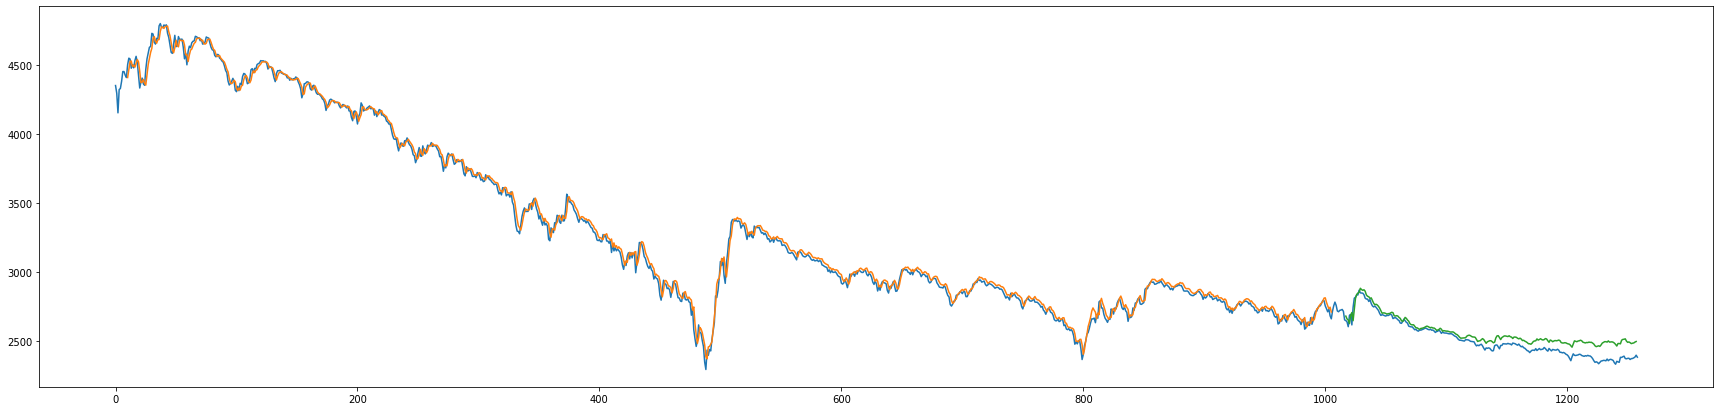

In [198]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
f,ax = plt.subplots(figsize = (30,7))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Conclusion

Looking at the past five years of performance during an unpredictable time, I was curious to see how well the LSTM models could perform while handling this timultuous data. First, a simple LSTM model was performed as a baseline LSTM model with a single hidden layer and an ouput layer was used to make the prediction. Next, a stacked LSTM allowed for more hidden layers to be stacked on top of one another, this showed improvement from simple model. Lastly, the bidirectional model was performed to see whether it was helpful for the LSTM model to take input sequences in both directions for learning purposes. 

The stacked LSTM model performed best of the models tested. 

#Setting up different pipeline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
import kaleido
import os

if not os.path.exists("images"):
  os.mkdir('images') # save plotly images

import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from time import time
from keras.models import Sequential
from keras import layers
from keras.losses import BinaryCrossentropy, Poisson, SparseCategoricalCrossentropy, mean_squared_error
from keras.metrics import BinaryAccuracy
from keras.callbacks import EarlyStopping

In [ ]:
all_data = yf.Ticker('^GSPC').history(start=dt.datetime(2017,3,1),
                           end=dt.datetime(2022,3,1)).reset_index()

In [ ]:
all_data.shape[0]*0.8 

In [ ]:
data_train = all_data.iloc[:1007, 1:4].copy()
data_test = all_data.iloc[1007:, 1:4].copy()

In [ ]:
data_train = all_data.iloc[:1007, 1:4].copy()
data_test = all_data.iloc[1007:, 1:4].copy()

In [ ]:
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 3))

testing_set = data_test.values
testing_set = np.reshape(testing_set, (len(testing_set), 3))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(training_set,
                                                  all_data.iloc[:1007, 4],
                                                  test_size=0.2,
                                                  random_state=42)
print(f'''X_train shape {X_train.shape}
y_train shape {len(y_train)}
X_val shape {X_val.shape}
y_val {len(y_val)}
''')

In [ ]:
#https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = data_train.values
    ts_test  = data_test.values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Close"], all_data["Close"]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    
      # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

In [ ]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

In [ ]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

In [ ]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

In [ ]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

In [ ]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Close', 'prediction'])
    actual_pred['Close'] = all_data.loc['2019':,'Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  

In [14]:
!pip install yfinance
!pip install -U kaleido

     |████████████████████████████████| 63 kB 666 kB/s 
     |████████████████████████████████| 6.4 MB 16.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 79.9 MB 104 kB/s 


In [34]:
#upload from raw link on github
data = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/FinancialTimeSeries/main/SP500.csv') 

In [35]:
data.shape

(1259, 7)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1259 non-null   object 
 1   Open      1259 non-null   float64
 2   High      1259 non-null   float64
 3   Low       1259 non-null   float64
 4   Close     1259 non-null   float64
 5   AdjClose  1259 non-null   float64
 6   Volume    1259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 69.0+ KB


In [40]:
def select_transform(data, features, y_output):
  split_80 = int((data.shape[0]*0.8))
  print(f"Split at {split_80}")

  x_train = data.loc[:split_80-1, features].copy()
  y_train = data.loc[:split_80-1, [y_output]].copy()

  x_test = data.loc[split_80:, features].copy()
  y_test = data.loc[split_80:, [y_output]].copy()

  minmax = MinMaxScaler(feature_range=(0,1))

  x_train_sc = minmax.fit_transform(x_train)
  y_train_sc = minmax.fit_transform(y_train)
  x_test_sc = minmax.fit_transform(x_test)
  y_test_sc = minmax.fit_transform(y_test)

  print(f'''X_train shape {x_train_sc.shape}
y_train shape {len(y_train_sc)}
X_test shape {x_test_sc.shape}
y_test {len(y_test_sc)}
''')

  return x_train_sc, y_train_sc, x_test_sc, y_test_sc, minmax

In [41]:
X_train, y_train, X_test, y_test, minmax = select_transform(data, ['Open', 'High','Low'], 'Close')

Split at 1007
X_train shape (1007, 3)
y_train shape 1007
X_test shape (252, 3)
y_test 252



In [42]:
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
#https://towardsdatascience.com/how-to-reshape-data-and-do-regression-for-time-series-using-lstm-133dad96cd00

def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)

    print(f"X_array shape {x_array.shape}\nY_array shape {y_array.shape}")
    return x_array, y_array

In [43]:
x_train_lstm, y_train_lstm = lstm_data_transform(X_train, y_train, 50)
print("-----\nTest")
x_test_lstm, y_test_lstm = lstm_data_transform(X_test, y_test, 50)

X_array shape (957, 50, 3)
Y_array shape (957, 1)
-----
Test
X_array shape (202, 50, 3)
Y_array shape (202, 1)


In [44]:
X_train, X_val, y_train, y_val = train_test_split(x_train_lstm,
                                                  y_train_lstm,
                                                  test_size=0.2,
                                                  random_state=22)
print(f'''X_train shape {X_train.shape}
y_train shape {len(y_train)}
X_val shape {X_val.shape}
y_val {len(y_val)}
''')

X_train shape (765, 50, 3)
y_train shape 765
X_val shape (192, 50, 3)
y_val 192



In [45]:
def run_model (model, model_name):
  callback = EarlyStopping(monitor='loss', patience=2)
  start = time()
  fitted_model = model.fit(X_train,
                           y_train,
                           callbacks=[callback],
                           epochs=50,
                           validation_data=(X_val, y_val))
  end = time()
  runtime = round((end-start), 4)
  print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
  return runtime

  def prediction (fitted_model, x_feat):
    pred = fitted_model.predict(x_feat)
  return pred

def prob_eval (y_true, y_prob, model_name, train_test):
  df=pd.DataFrame({ 'model_name': [model_name, model_name],
                   'type': [train_test, train_test],
                   'metric_name': ['bsl', 'log_loss'],
                   'metric' : [round(brier_score_loss(y_true, y_prob), 4),
                               round(log_loss(y_true, y_prob), 4)]})
  display(df)
  return df

#Additional model

In [46]:
rnn1 = Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[50, 3]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(1)
])

rnn1.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

In [47]:
rnn1_rt = run_model(rnn1, 'rnn1')

Epoch 1/50
24/24 [==============================] - 6s 83ms/step - loss: 0.0117 - accuracy: 0.0013 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 2/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0013 - accuracy: 0.0013 - val_loss: 7.7474e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
24/24 [==============================] - 1s 47ms/step - loss: 6.5810e-04 - accuracy: 0.0013 - val_loss: 6.3453e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
24/24 [==============================] - 1s 31ms/step - loss: 5.1237e-04 - accuracy: 0.0013 - val_loss: 4.9443e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
24/24 [==============================] - 1s 33ms/step - loss: 4.5212e-04 - accuracy: 0.0013 - val_loss: 4.9425e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
24/24 [==============================] - 1s 32ms/step - loss: 4.5674e-04 - accuracy: 0.0013 - val_loss: 4.1358e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
24/24 [==============================] - 1s 28ms/step - loss: 3.9157e-04 - accuracy

In [48]:
[print(i.shape, i.dtype) for i in rnn1.inputs]
[print(o.shape, o.dtype) for o in rnn1.outputs]
[print(l.name, l.input_shape, l.dtype) for l in rnn1.layers]

(None, 50, 3) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
simple_rnn_2 (None, 50, 3) float32
simple_rnn_3 (None, 50, 20) float32
simple_rnn_4 (None, 50, 20) float32


[None, None, None]

In [49]:
sequences = np.asarray(X_train)
targets   = np.asarray(y_train)
display(sequences.shape, targets.shape)

Sequences = np.expand_dims(sequences, -1)
Targets   = np.expand_dims(targets, -1)
display(Sequences.shape, Targets.shape)

(765, 50, 3)

(765, 1)

(765, 50, 3, 1)

(765, 1, 1)

In [ ]:
def compare_pred_actual(X, y, test_train):
  pred = minmax.inverse_transform(rnn1.predict(X))
  actual = minmax.inverse_transform(y)

  pred_lst = [round(pred[row][0],3) for row in range(0,len(pred))]
  actual_lst = [round(actual[row][0],3) for row in range(0,len(actual))]
  diff = [(actual_lst[row] - pred_lst[row]) for row in range(0, len(pred))]

  compare_train = pd.DataFrame(list(zip(actual_lst, pred_lst, diff)),
                              columns=[f"Actual_{test_train}", f"Pred_{test_train}", 'Diff'])
  return pred_lst, actual_lst, compare_train

In [ ]:
pred_train, actual_train, compare_train = compare_pred_actual(X_train, y_train, 'Train')
compare_train.head()

In [ ]:
compare_train.describe()